- 33회 시험에서는 전처리가 복잡했던 것이 특징, 동형모의고사이며 실제 시험 문제와는 다릅니다.      
    저작권은 datamanim에 있으면 외부유출 및 공개 블로그 깃 등에 업로드를 금지합니다.
- 실제 시험에서는 문제 표기 없습니다.
- 데이터를 코드랑 같은 경로로 위치시켜야 합니다.
- 풀이영상을 보기 전에 4시간 동안 시간을 따로 내어 풀어본 후에 보시길!

# 33회 ADP 복원 

# 기계학습 (60점)

## 데이터 설명
- 데이터 출처 : https://archive.ics.uci.edu/ml/datasets/HCV+data 후처리
- 데이터 링크 : ./data/p1.csv
- 데이터 설명 : 혈액수치 데이터, 간염 정도에 따른

Category (종속변수) 
- 0: 정상
- 1,2,3 (간염 정도, 심각성 : 3>2>1, 3은 간경화)


In [11]:
import pandas as pd 
df = pd.read_csv("./data/p1.csv")
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=B,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=B,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=B,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=B,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=B,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## 1-1  결측치 처리 방안 2개 제시하고, 처리 전후 비교 및 더 나은 방안 선택하여 전처리 완료

In [12]:
remove_ratio = round((df.shape[0] -  df.dropna().shape[0]) /df.shape[0] * 100,2)
isnull = pd.concat([df.isnull().sum()[df.isnull().sum() != 0],df.dtypes],axis=1).dropna()
isnull[0] = isnull[0].astype('int')
null_col = isnull.index


df_preprocessing = df.copy()
for idx in null_col:
    df_preprocessing[idx] = df_preprocessing[idx].fillna(df_preprocessing.groupby('Category')[idx].transform('mean'))


result = pd.concat([isnull,df[null_col].describe().T[['std','mean']].round(2),df_preprocessing[null_col].describe().T[['std','mean']].round(2)],axis=1)
result.columns =['결측치수','타입','전처리 전 표준편차','전처리 전 평균','전처리 후 표준편차','전처리 후 평균']
display(result)
print(f'''
결측치 처리방안
1. 해당 행 제거
2. 카테고리별 그룹핑 하여 범주형변수의 경우 최빈값, 수치형변수의 경우 평균값으로 대치

결측치는 ALP 컬럼
1번 방법으로 행 제거시 {remove_ratio}%의 데이터 손실
2번 방법으로 결측치 대치하면 평균과 표준 편차 큰차이 없음
''')

,결측치수,타입,전처리 전 표준편차,전처리 전 평균,전처리 후 표준편차,전처리 후 평균
ALB,1,float64,5.41,41.82,5.42,41.80
ALP,18,float64,25.27,67.82,25.35,67.50
ALT,1,float64,21.23,27.60,21.21,27.60
CHOL,10,float64,1.12,5.38,1.11,5.37
PROT,1,float64,4.93,72.25,4.93,72.25



결측치 처리방안
1. 해당 행 제거
2. 카테고리별 그룹핑 하여 범주형변수의 경우 최빈값, 수치형변수의 경우 평균값으로 대치

결측치는 ALP 컬럼
1번 방법으로 행 제거시 4.28%의 데이터 손실
2번 방법으로 결측치 대치하면 평균과 표준 편차 큰차이 없음



## 1-2 이상치를 확인하고 처리 여부 판단 후 작업

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

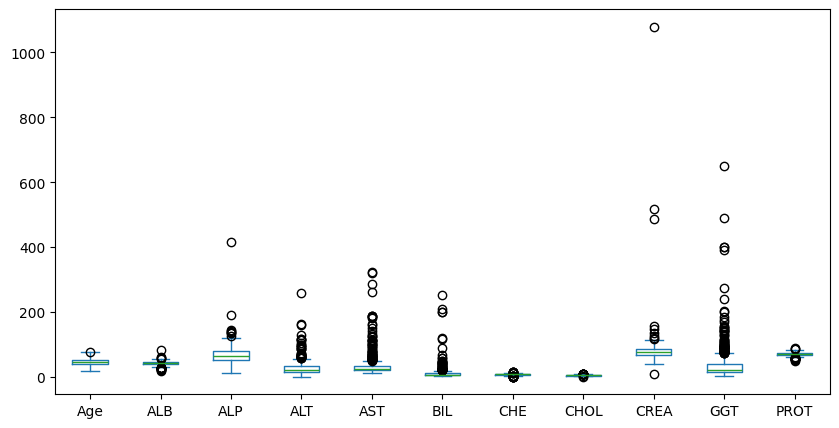


컬럼 별 이상치가 존재하는 것으로 보인다. 하지만 이상치가 간염 정도를 구분짓는 중요 요인으로 작용할 수 있기에 따로 데이터 변환을 진행하진 않는다.



In [14]:
df_preprocessing.drop(columns =['Category','Sex']).plot(kind='box',figsize=(10,5))
plt.show()
print('''
컬럼 별 이상치가 존재하는 것으로 보인다. 하지만 이상치가 간염 정도를 구분짓는 중요 요인으로 작용할 수 있기에 따로 데이터 변환을 진행하진 않는다.
''')

## 1-3 위 두 작업 적용 후 EDA 진행) 및 종속변수를 기준으로 각 독립변수의 차이가 있는지 확인하라 (시각화포함)

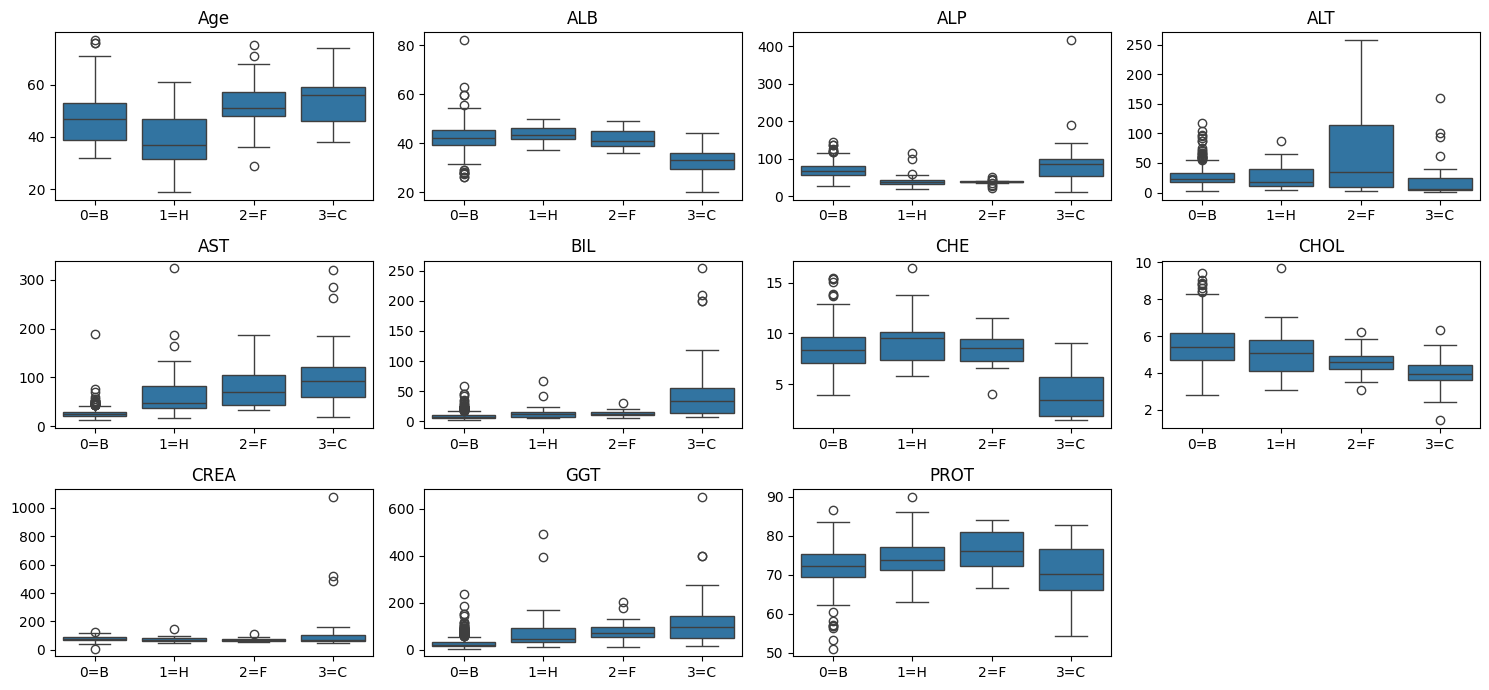

In [15]:
fig,axes = plt.subplots(3,4,figsize=(15,7))

target_col = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE','CHOL', 'CREA', 'GGT', 'PROT']
for i,ax in enumerate(axes.flat[:-1]):
    target_df = df_preprocessing[['Category',target_col[i]]]
    sns.boxplot(x= 'Category',y = target_col[i] ,data = target_df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(target_col[i])
    
axes.flat[-1].remove()
plt.tight_layout()
plt.show()

## 1-4 주어진 데이터로부터 주성분분석을 수행해 새로운 설명변수를 도출할 수 있는지를 검토 ∙ 판단한 뒤, 그 결과를 제시하시오

## 2-1 데이터 불균형이 왜 문제인지 설명하고 불균형 해결방법에 대해 두가지를 설명하라

## 2-2 불균형 데이터 분류모델에 적합한 평가지표 3개 제시하고 그 이유 설명하라

## 2-3 종속 변수를 정상(Category 0)과 비정상(Category 1,2,3)로 변경한 후 위의 2가지 불균형 처리 방법을 사용하고, 3가지 평가지표로 결과를 각각 평가하라.
(학습 규칙)
- 종속 변수를 이진화 후 불균형 처리 방법 진행
- 전처리 후 데이터 행의 index number를 초기화 하라(0부터 시작)
- index number 값이 5로 나눈 나머지가 0이라면 test, 그 외의 경우 train set으로 하여 진행
- 3가지 분류 모델을 사용하라

## 3-1 1에서 전처리 완료한 데이터를 바탕으로 종속변수에서 0을 제외한 1,2,3의 데이터만 필터하여 분류모델 학습 및 평가를 진행하라. 
(학습 규칙)
- 전처리 후 데이터 행의 index number를 초기화 하라(0부터 시작)
- index number 값이 5로 나눈 나머지가 0이라면 test, 그 외의 경우 train set으로 하여 진행
- 3개의 분류 모델을 사용하라

## 3-2 학습한 모델 결과와 평가지표를 바탕으로 간염여부에 영향을 미치는 요소들에 대해 논의하라

## 데이터 설명
- 데이터 출처 : https://www.data.go.kr/data/15048032/fileData.do / 후처리, 통계청 날씨정보
- 데이터 링크 : 
    - ./data/p2_sb_2021.csv
    - ./data/p2_sb_2022.csv
    - ./data/p2_sb_2023.csv
    - ./data/p2_w_2021.csv
    - ./data/p2_w_2022.csv
    - ./data/p2_w_2023.csv
- 데이터 설명 : 
    - 21년~23년의 J시의 2개 지하철호선 지하철의 시간대별 승하차 인원 정보 데이터 (p2_sb_년도.csv)
        - X5~ X22 : 5시부터 22시 승차 또는 하차 인원, (X5 : 05시의 계절 날짜와 대응)
        - 역번호 : 각 정류장의 고유 번호
        - 승하차구분 : 승차 또는 하차
    - 21년~23년의 J시의 특정지역구의 시간대별 게절성 정보 데이터 (p2_w_년도.csv)
        - 시간별 J시의 날씨정보 

In [17]:
p = pd.read_csv('./data/p2_sb_2021.csv')
weather = pd.read_csv('./data/p2_w_2021.csv')
display(p.head())
display(weather.head())

,날짜,호선,역번호,승하차구분,X5,X6,X7,X8,X9,X10,...,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22
0,2021-01-01,A,201,승차,22.0,25,61,64,58,53,...,109,149,196,168,178,177,117,138,90,58
1,2021-01-01,A,201,하차,12.0,49,87,142,101,110,...,105,125,114,86,119,63,26,25,62,18
2,2021-01-01,A,202,승차,43.0,53,70,119,94,103,...,331,323,437,447,881,531,335,441,403,137
3,2021-01-01,A,202,하차,21.0,154,238,727,425,356,...,330,342,321,333,331,163,119,110,137,47
4,2021-01-01,A,203,승차,21.0,27,48,81,62,60,...,156,197,197,203,213,190,145,208,135,76


,일시,기온,강수량,풍속,습도,증기압,현지기압,전운량,중하층운량,지면온도
0,2021-01-01 00:00,-8.3,NaN,1.8,66,2.2,1016.4,0.0,0,-6.8
1,2021-01-01 01:00,-8.7,NaN,2.4,68,2.2,1016.4,0.0,0,-6.9
2,2021-01-01 02:00,-9.1,NaN,1.6,69,2.1,1016.2,0.0,0,-7.1
3,2021-01-01 03:00,-9.3,NaN,1.1,70,2.1,1016.8,0.0,0,-7.3
4,2021-01-01 04:00,-9.3,NaN,0.3,71,2.2,1016.2,0.0,0,-7.5


## 4-1 아래 조건들을 참고하여 전처리를 시행하고 훈련데이터에 대한 기초통계량을 구하시오
1. 승하차 데이터에서 X5~X22 모든컬럼이 0의 값을 가지는 경우 해당 날짜,호선,역번호 승하차 행은 제외한다. 
2. 승하차 데이터를 날짜,호선,역번호,시간대별(05~22시) 승객수의 총합을 구하여라(승차 + 하차), 결측치는 0명으로 간주한다. 컬럼명은 users로 변경한다.
3. 날짜 데이터의 강수 데이터는 결측치를 0, 그 외 컬럼의 결측치는 직전값으로 대치한다.
4. 날짜데이터와 일자,시간별 승하차인원 데이터를 동일날짜,시간에 대해 합친다.
5. 일자정보를 바탕으로 주말 여부를 나타내는 weekday컬럼을 추가한다. (주말=1,평일=0)
6. 21년,22년 데이터는 훈련데이터, 23년 데이터는 테스트 데이터로 사용한다.

In [19]:
import os
[x for x in os.listdir('./data/') if 'p2' in x]

['p2_sb_2023.csv',
 'p2_sb_2022.csv',
 'p2_sb_2021.csv',
 'p2_w_2022.csv',
 'p2_w_2023.csv',
 'p2_w_2021.csv']

In [90]:
import pandas as pd

sb = pd.concat([pd.read_csv('./data/' + x) for x in [x for x in os.listdir('./data/') if 'p2_sb' in x]]).reset_index(drop=True)
w = pd.concat([pd.read_csv('./data/' + x) for x in [x for x in os.listdir('./data/') if 'p2_w' in x]]).reset_index(drop=True)

# 모든행 합이 0인 경우 제외
sb= sb[sb.iloc[:,4:].sum(axis=1) !=0].reset_index(drop=True)

# 결측치 0으로 채우기, 결측치 존재 컬럼은 X5 뿐
sb = sb.fillna(0)

# 승하차 데이터를 날짜,호선,역번호,시간대별(05~22시) 승객수의 총합을 구하여라(승차 + 하차), 결측치는 0명으로 간주한다. 컬럼명은 users로 변경한다. 
sb_melt = sb.drop(columns =['승하차구분']).groupby(['날짜','호선','역번호']).sum().reset_index().melt(['날짜','호선','역번호'])
sb_melt = sb_melt.rename(columns ={'variable':'시간','value':'users'})
sb_melt['시간'] = sb_melt['시간'].str.replace('X','')
sb_melt['일시'] = pd.to_datetime(sb_melt['날짜'] + ' ' + sb_melt['시간'],format='%Y-%m-%d %H')
sb_melt = sb_melt.drop(columns =['날짜','시간'])

w['강수량'] = w['강수량'].fillna(0)
w = w.sort_values('일시').reset_index(drop=True).ffill() # 일시로 정렬 후 값 대치
w['일시'] = pd.to_datetime(w['일시'])

total = pd.merge(sb_melt,w)
# help(total['일시'].dt) -> .dt 요소 확인
# total['일시'].dt.day_of_week or total['일시'].dt.weekday : Monday=0, Sunday=6
total['weekday'] =total['일시'].dt.weekday.map(lambda x : 1 if x in [5,6] else 0)

display(total.head())

train = total[total['일시'].dt.year.isin([2021,2022])].reset_index(drop=True)
test = total[total['일시'].dt.year == 2023].reset_index(drop=True)



,호선,역번호,users,일시,기온,강수량,풍속,습도,증기압,현지기압,전운량,중하층운량,지면온도,weekday
0,A,201,34.0,2021-01-01 05:00:00,-9.7,0.0,1.9,72,2.1,1015.6,0.0,0,-7.6,0
1,A,202,64.0,2021-01-01 05:00:00,-9.7,0.0,1.9,72,2.1,1015.6,0.0,0,-7.6,0
2,A,203,39.0,2021-01-01 05:00:00,-9.7,0.0,1.9,72,2.1,1015.6,0.0,0,-7.6,0
3,A,204,23.0,2021-01-01 05:00:00,-9.7,0.0,1.9,72,2.1,1015.6,0.0,0,-7.6,0
4,A,205,67.0,2021-01-01 05:00:00,-9.7,0.0,1.9,72,2.1,1015.6,0.0,0,-7.6,0


## 4-2 전체 년도 데이터에 대해 users와 날씨 정보에 대해 상관관계를 분석하고 주말여부에 따른 users 변수의 차이가 존재하는지 통계적으로 확인하라.

In [94]:
total.drop(columns =['호선','역번호','일시']).corr()['users'][1:].sort_values()

weekday   -0.177318
습도        -0.051947
중하층운량     -0.013331
현지기압      -0.011956
전운량       -0.008708
강수량       -0.003306
증기압        0.000272
지면온도       0.023862
기온         0.032292
풍속         0.051441
Name: users, dtype: float64

In [95]:
g1= total[total.weekday ==0]['users']
g2= total[total.weekday ==1]['users']
# TTEST

## 4-3 users를 예측하는 2가지 회귀모델을 학습하고 모델에 대해 평가하라 (선형회귀 모델은 1개 필수 포함)

# 통계 (40점)

## 데이터 설명
- 데이터 출처 : 자체 제작
- 데이터 링크 : ./data/s1.csv
- 데이터 설명 : A,B 두 공장의 특정 일자의 수율(%)데이터. 단, 불량률은 (100 - 수율)로 정의한다.
    

In [7]:
df = pd.read_csv('./data/s1.csv')
df.head()

,year,month,day,A,B
0,2023,Sep,7,56.9,42.3
1,2023,Feb,20,100.0,89.0
2,2023,Jun,15,19.3,59.0
3,2023,Apr,11,98.0,84.8
4,2023,Jul,8,89.5,63.8


## 5-1 공장별 결측치, 기초통계량 등을 확인하라

## 5-2 A,B 공장의 불량률 차이가 존재하는지 확인하려 한다. 귀무,대립 가설을 설정하고 설명하라

## 5-3 A,B의 차이가 있는지 통계검정 하고 설명하라

## 데이터 설명
- 데이터 출처 : https://www.data.go.kr/data/15123586/fileData.do 후처리
- 데이터 링크 : ./data/s2.csv
- 데이터 설명 : 일자별 지하철 노션별 지연 데이터

In [8]:
import pandas as pd
df = pd.read_csv('./data/s2.csv')
df.head()

,지연ID,지연일자,노선,최대지연시간
0,ID_0,2023-09-01,1호선,15분
1,ID_1,2023-09-01,1호선,15분
2,ID_2,2023-09-01,4호선,10분
3,ID_3,2023-09-01,4호선,10분
4,ID_4,2023-09-04,4호선,10분


In [9]:
df['최대지연시간'].value_counts()

최대지연시간
10분       414
5분        179
15분       153
20분        58
25분        16
30분 이상     13
Name: count, dtype: int64

## 6-1 노선에 상관없이 일별 최대 지연시간이 5~15분으로 발생하는 경우는 하나의 사건으로 보자. 해당 사건이 일자별 발생하는 빈도가 푸아송분포를 따르는지 확인하는 방법 2가지를 기술하고 결과를 보여라

## 6-2 10분이하, 10분초과 -20분 이하, 20분초과  3가지로 지연시간을 지연정도로 분류하라. 호선별 지연정도를 교차표로 구하여라

## 6-3 지하철 호선별로 지연정도가 차이가 있는지 확인하려한다. 귀무가설과 대립가설을 설정한 후 통계 검정을 실시하라

## 데이터 설명
- 데이터 출처 : 자체제작
- 데이터 링크 : ./data/s3.csv
- 데이터 설명 : 시계열 정보를 가지는 250행의 데이터

In [10]:
import pandas as pd
df = pd.read_csv('./data/s3.csv')
df.head()

,0.4967141530112327
0,0.308778
1,0.692133
2,2.070861
3,1.326845
4,0.077552


## 7-1 ar ma arma에 대해 설명하고, ACF, PACF는 패턴을 통해 설명하라.

## 7-2 Acf pacf를 그리고 해석하라, 해당 Plot data를 기반으로 ARMA(p,q)모형 제시하라